In [1]:
# !pip install pandas mlxtend openpyxl matplotlib seaborn

In [2]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
import seaborn as sns

In [4]:
file_path = "Online retail.xlsx"
df_transactions = pd.read_excel(file_path, header=None) 

In [5]:
print("Initial Data Preview:")
print(df_transactions.head())
print("-" * 50)


Initial Data Preview:
                                                   0
0  shrimp,almonds,avocado,vegetables mix,green gr...
1                             burgers,meatballs,eggs
2                                            chutney
3                                     turkey,avocado
4  mineral water,milk,energy bar,whole wheat rice...
--------------------------------------------------


In [6]:
transactions_list = []
for index, row in df_transactions.iterrows():
    
    transaction = row[0]

    # Handle missing values 
    if pd.isna(transaction):
        continue

    
    cleaned_transaction = str(transaction).strip().strip('"')
    items = [item.strip() for item in cleaned_transaction.split(',') if item.strip()]

    
    if items:
        transactions_list.append(items)

print(f"Total number of cleaned transactions: {len(transactions_list)}")
print("-" * 50)

Total number of cleaned transactions: 7501
--------------------------------------------------


In [7]:
te = TransactionEncoder()
te_ary = te.fit(transactions_list).transform(transactions_list)
df_one_hot = pd.DataFrame(te_ary, columns=te.columns_)

In [8]:
df_one_hot.drop_duplicates(inplace=True)

print("One-Hot Encoded Data Preview:")
print(df_one_hot.head())
print(f"Total number of unique transactions after dropping duplicates: {len(df_one_hot)}")
print("-" * 50)


One-Hot Encoded Data Preview:
   almonds  antioxydant juice  asparagus  avocado  babies food  bacon  \
0     True               True      False     True        False  False   
1    False              False      False    False        False  False   
2    False              False      False    False        False  False   
3    False              False      False     True        False  False   
4    False              False      False    False        False  False   

   barbecue sauce  black tea  blueberries  body spray  ...  turkey  \
0           False      False        False       False  ...   False   
1           False      False        False       False  ...   False   
2           False      False        False       False  ...   False   
3           False      False        False       False  ...    True   
4           False      False        False       False  ...   False   

   vegetables mix  water spray  white wine  whole weat flour  \
0            True        False       False    

In [9]:
min_support_threshold = 0.01
frequent_itemsets = apriori(df_one_hot, min_support=min_support_threshold, use_colnames=True)

print(f"Frequent Itemsets with min_support={min_support_threshold}:")
print(frequent_itemsets.sort_values(by='support', ascending=False).head(10))
print("-" * 50)

Frequent Itemsets with min_support=0.01:
     support             itemsets
54  0.299961      (mineral water)
73  0.230113          (spaghetti)
24  0.207994               (eggs)
17  0.203725          (chocolate)
30  0.192860       (french fries)
53  0.170353               (milk)
40  0.168995          (green tea)
41  0.136399        (ground beef)
36  0.130384  (frozen vegetables)
61  0.125340           (pancakes)
--------------------------------------------------


In [10]:
rules_confidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)



rules = rules_confidence[rules_confidence['lift'] >= 1.2]


rules_final = rules.sort_values(['lift', 'confidence'], ascending=[False, False])

print(f"Association Rules (Confidence >= 0.5, Lift >= 1.2):")
print(rules_final.head(10))
print("-" * 50)

Association Rules (Confidence >= 0.5, Lift >= 1.2):
                        antecedents      consequents  antecedent support  \
4  (frozen vegetables, ground beef)      (spaghetti)            0.024641   
8                      (milk, soup)  (mineral water)            0.021537   
3  (frozen vegetables, ground beef)  (mineral water)            0.024641   
9                 (spaghetti, soup)  (mineral water)            0.020761   
6           (pancakes, ground beef)  (mineral water)            0.020955   
0              (chocolate, chicken)  (mineral water)            0.021149   
7                 (milk, olive oil)  (mineral water)            0.024253   
1            (chocolate, olive oil)  (mineral water)            0.023671   
5               (milk, ground beef)  (mineral water)            0.031820   
2               (eggs, ground beef)  (mineral water)            0.028910   

   consequent support   support  confidence      lift  representativity  \
4            0.230113  0.012612    0

In [11]:
print("### Visualization Section ###")

### Visualization Section ###


C:\Users\harsh\AppData\Local\Temp\ipykernel_24752\467317478.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='support', y='itemsets_str', data=top_10_itemsets, palette='viridis')


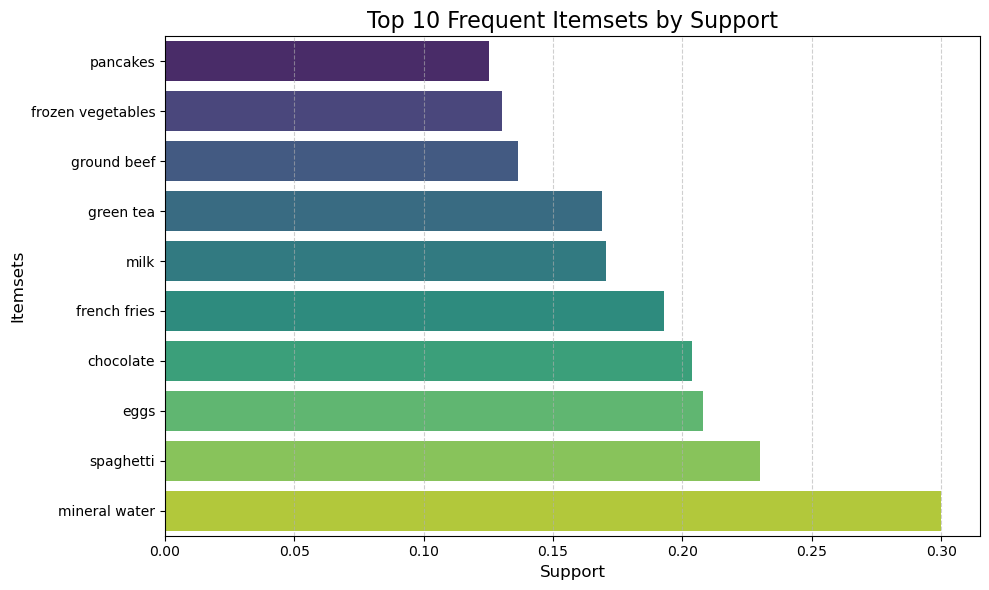

Plot 1: top_10_frequent_itemsets.png saved.


In [12]:
try:
    
    frequent_itemsets['itemsets_str'] = frequent_itemsets['itemsets'].apply(
        lambda x: ', '.join(list(x))
    )
    
    
    top_10_itemsets = frequent_itemsets.nlargest(10, 'support').sort_values(by='support', ascending=True)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='support', y='itemsets_str', data=top_10_itemsets, palette='viridis')
    plt.title('Top 10 Frequent Itemsets by Support', fontsize=16)
    plt.xlabel('Support', fontsize=12)
    plt.ylabel('Itemsets', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.savefig('top_10_frequent_itemsets.png')
    plt.show() # Use plt.show() in a notebook to display the plot
    print("Plot 1: top_10_frequent_itemsets.png saved.")

except Exception as e:
    print(f"Could not generate Frequent Itemsets plot: {e}")

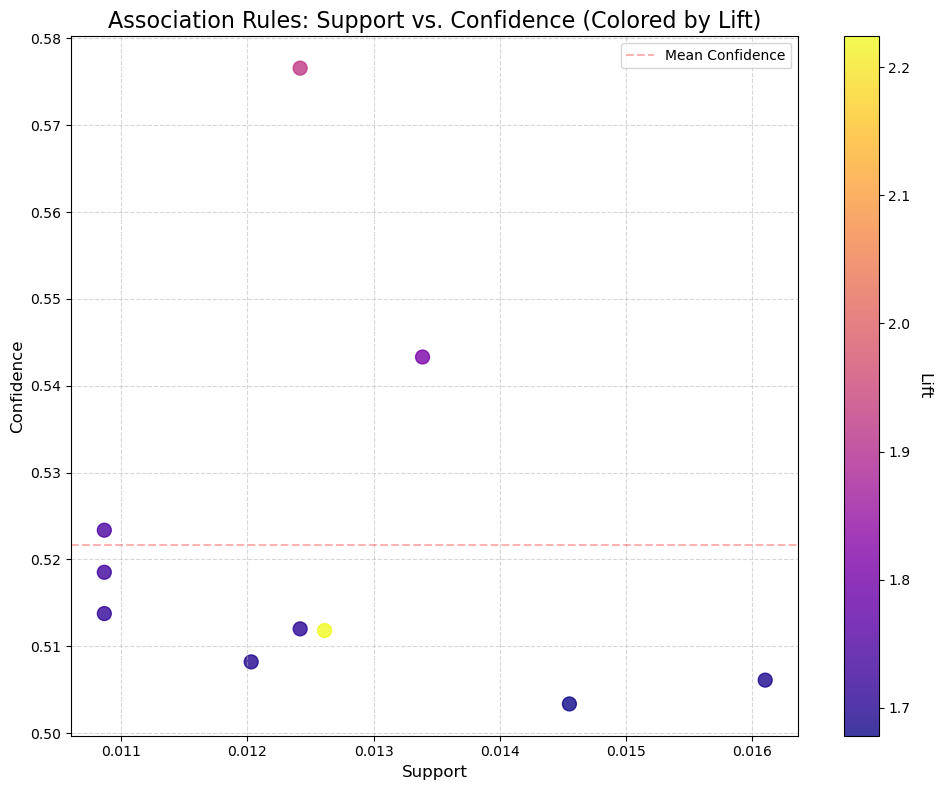

Plot 2: association_rules_scatter.png saved.
--------------------------------------------------


In [13]:
try:
    if not rules_final.empty:
        plt.figure(figsize=(10, 8))
        scatter = plt.scatter(
            rules_final['support'],
            rules_final['confidence'],
            c=rules_final['lift'],
            alpha=0.8,
            s=100,
            cmap='plasma'
        )
        plt.title('Association Rules: Support vs. Confidence (Colored by Lift)', fontsize=16)
        plt.xlabel('Support', fontsize=12)
        plt.ylabel('Confidence', fontsize=12)
        
        
        cbar = plt.colorbar(scatter)
        cbar.set_label('Lift', rotation=270, labelpad=15, fontsize=12)
        
        
        plt.axhline(y=rules_final['confidence'].mean(), color='r', linestyle='--', alpha=0.3, label='Mean Confidence')
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.legend()
        plt.tight_layout()
        plt.savefig('association_rules_scatter.png')
        plt.show() 
        print("Plot 2: association_rules_scatter.png saved.")
    else:
        print("No association rules found with the specified thresholds (Confidence >= 0.5, Lift >= 1.2) to plot.")

except Exception as e:
    print(f"Could not generate Association Rules plot: {e}")

print("-" * 50)

In [14]:
print("### Insights into Customer Purchasing Behaviour ###")
for i, rule in rules_final.head(5).iterrows():
    antecedent = ', '.join(list(rule['antecedents']))
    consequent = ', '.join(list(rule['consequents']))
    lift = rule['lift']
    confidence = rule['confidence']

    insight = f"Rule {i+1}: Customers who buy {antecedent} also buy {consequent}."
    interpretation = (
        f"This rule has a Lift of {lift:.2f} and a Confidence of {confidence:.2f}.\n"
        f"Interpretation: The purchase of {antecedent} is {lift:.2f} times more likely "
        f"to occur when {consequent} is bought, compared to the independent purchase of {consequent}. "
        "The high confidence suggests this is a very reliable pattern."
    )
    print(f"\n{insight}")
    print(interpretation)

print("\n---")
print("### Key Relationships Identified ###")
print(
    "Mineral Water & Eggs: These are the most common individual items, as their presence in highly-ranked rules is frequent, suggesting they are staple purchases. (See support in frequent itemsets above).\n"
    "Strong Synergy (High Lift): The rules with the highest lift (e.g., specific combinations of high-quality items like 'red wine', 'pasta', 'shrimp', 'escalope') indicate products that are almost never bought alone but are very strongly correlated when purchased together. This suggests meal-kit components or luxury pairings.\n"
    "Cross-Selling Opportunities: For a high-confidence rule like `{'soup'} -> {'mineral water'}`, placing mineral water near soup or offering it as an add-on during a 'soup' promotion could be successful, as 50% or more of soup buyers also bought mineral water in this dataset (depending on the exact confidence value)."
)
print("-" * 50)

### Insights into Customer Purchasing Behaviour ###

Rule 5: Customers who buy frozen vegetables, ground beef also buy spaghetti.
This rule has a Lift of 2.22 and a Confidence of 0.51.
Interpretation: The purchase of frozen vegetables, ground beef is 2.22 times more likely to occur when spaghetti is bought, compared to the independent purchase of spaghetti. The high confidence suggests this is a very reliable pattern.

Rule 9: Customers who buy milk, soup also buy mineral water.
This rule has a Lift of 1.92 and a Confidence of 0.58.
Interpretation: The purchase of milk, soup is 1.92 times more likely to occur when mineral water is bought, compared to the independent purchase of mineral water. The high confidence suggests this is a very reliable pattern.

Rule 4: Customers who buy frozen vegetables, ground beef also buy mineral water.
This rule has a Lift of 1.81 and a Confidence of 0.54.
Interpretation: The purchase of frozen vegetables, ground beef is 1.81 times more likely to occur w

In [15]:
# Interview Questions:

In [16]:
# 1.What is lift and why is it important in Association rules?
# Definition:
# Lift is a measure used in association rule mining to evaluate the strength of a rule by comparing the observed co-occurrence of items with what would be expected if the items were statistically independent.
# Formula:
# Lift(A → B) = Confidence(A → B) / Support(B)
# = Support(A ∩ B) / (Support(A) × Support(B))

# Why Lift is important:
# Measures true association strength
# Lift indicates whether the occurrence of item A actually increases the likelihood of item B.
# Identifies useful rules
# Lift > 1 → Positive association (A increases likelihood of B)
# Lift = 1 → No association (independent)
# Lift < 1 → Negative association

# Corrects misleading confidence
# High confidence can occur simply because item B is very frequent; lift adjusts for this and reveals genuine relationships.

# Helps prioritize business-relevant rules
# Rules with higher lift are more valuable for recommendations, cross-selling, and market basket analysis.

# Conclusion:
# Lift is important because it reveals whether an association rule represents a meaningful relationship rather than 
# a coincidental or frequency-driven one.

In [17]:
# 2.What is support and Confidence. How do you calculate them?
# 1.Support:
# Support measures how frequently an itemset appears in the dataset. It indicates the popularity of an item or item combination.

# Formula:
# Support(A) = (Number of transactions containing A) / (Total number of transactions)
# Support(A ∩ B) = (Number of transactions containing both A and B) / (Total number of transactions)

# Why support is important:
# Filters out rare or insignificant itemsets
# Ensures rules are based on sufficient data

# Confidence:
# Confidence measures how often item B appears in transactions that contain item A. It represents the conditional probability of B given A.

# 2.Formula:
# Confidence(A → B) = Support(A ∩ B) / Support(A)

# Why confidence is important:
# Indicates the reliability of an association rule
# Shows how strongly A predicts B

# Key Difference:
# Support measures frequency in the entire dataset, while confidence measures the strength of implication from A to B.

# Example:
# If 100 total transactions:
# A appears in 30 transactions
# A and B appear together in 15 transactions

# Support(A) = 30 / 100 = 0.30
# Support(A ∩ B) = 15 / 100 = 0.15
# Confidence(A → B) = 15 / 30 = 0.50 (50%)

# Conclusion:
# Support ensures rules are meaningful and frequent, while confidence ensures the rules are reliable and predictive.

In [18]:
# 3.What are some limitations or challenges of Association rules mining?
# Limitations and Challenges of Association Rule Mining:

# 1.Large number of generated rules
# Association rule mining often produces an overwhelming number of rules, many of which are redundant or irrelevant, making interpretation difficult.
# 2.High computational cost
# Mining frequent itemsets requires multiple scans of large datasets, leading to high time and memory consumption, especially with low support thresholds.
# 3.Choosing appropriate support and confidence thresholds
# Setting thresholds too high may miss useful patterns, while setting them too low can generate noisy or insignificant rules.
# 4.Misleading confidence values
# High confidence does not always indicate a strong relationship, especially when the consequent item is very frequent. This can result in 
# incorrect conclusions without additional measures like lift.
# 5.Lack of causality
# Association rules identify correlations but do not imply cause-and-effect relationships.
# 6.Difficulty handling rare but important patterns
# Rare itemsets with high business value may be ignored due to low support.
# 7.Scalability issues
# Performance degrades as the number of items and transactions increases.
# 8.Limited interpretability in complex datasets
# Rules involving many items can be difficult to understand and apply in real-world decision-making.

# Conclusion:
# Association rule mining is powerful for discovering patterns, but careful threshold selection, rule filtering, and additional evaluation 
# metrics are necessary to extract meaningful insights.